# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
city_url = url + f"q={city}&appid={weather_api_key}"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guntakal junction
Processing Record 2 of Set 1 | vernon
Processing Record 3 of Set 1 | sao gabriel da cachoeira
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | yangor
City not found. Skipping...
Processing Record 7 of Set 1 | queenstown
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | suihua
Processing Record 10 of Set 1 | boa vista
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | kilju
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | ardakan
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | kodiak
Processing Record 22 

Processing Record 36 of Set 4 | uturoa
Processing Record 37 of Set 4 | vadso
Processing Record 38 of Set 4 | northam
Processing Record 39 of Set 4 | aars
Processing Record 40 of Set 4 | labasa
Processing Record 41 of Set 4 | ivins
Processing Record 42 of Set 4 | nuuk
Processing Record 43 of Set 4 | alice town
Processing Record 44 of Set 4 | kyren
Processing Record 45 of Set 4 | terbanggi besar
Processing Record 46 of Set 4 | mytilene
Processing Record 47 of Set 4 | ola
Processing Record 48 of Set 4 | fenoarivo be
Processing Record 49 of Set 4 | qaqortoq
Processing Record 0 of Set 5 | afaahiti
Processing Record 1 of Set 5 | bonnyville
Processing Record 2 of Set 5 | teglas
Processing Record 3 of Set 5 | maxixe
Processing Record 4 of Set 5 | khorixas
Processing Record 5 of Set 5 | sorong
Processing Record 6 of Set 5 | rio claro
Processing Record 7 of Set 5 | talara
Processing Record 8 of Set 5 | portland
Processing Record 9 of Set 5 | pechory
Processing Record 10 of Set 5 | saldanha
Proce

Processing Record 31 of Set 8 | kerikeri
Processing Record 32 of Set 8 | carnarvon
Processing Record 33 of Set 8 | maintirano
Processing Record 34 of Set 8 | gadhada
Processing Record 35 of Set 8 | st. john's
Processing Record 36 of Set 8 | gebeit
Processing Record 37 of Set 8 | lev tolstoy
Processing Record 38 of Set 8 | marang
Processing Record 39 of Set 8 | maubara
City not found. Skipping...
Processing Record 40 of Set 8 | santo domingo petapa
Processing Record 41 of Set 8 | hilo
Processing Record 42 of Set 8 | nikolayevsk-on-amure
Processing Record 43 of Set 8 | mount isa
Processing Record 44 of Set 8 | saku
Processing Record 45 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 46 of Set 8 | kulhudhuffushi
Processing Record 47 of Set 8 | shingu
Processing Record 48 of Set 8 | kirkland lake
Processing Record 49 of Set 8 | les cayes
Processing Record 0 of Set 9 | zhaobaoshan
Processing Record 1 of Set 9 | orumiyeh
Processing Record 2 of Set 9 | vennesla
Proce

Processing Record 18 of Set 12 | rio grande
Processing Record 19 of Set 12 | agadez
Processing Record 20 of Set 12 | kayangel
Processing Record 21 of Set 12 | ampanihy
Processing Record 22 of Set 12 | alytus
Processing Record 23 of Set 12 | severo-yeniseyskiy
Processing Record 24 of Set 12 | chandla
Processing Record 25 of Set 12 | chahuites
Processing Record 26 of Set 12 | solnechnyy
Processing Record 27 of Set 12 | jabor
Processing Record 28 of Set 12 | jayapura
Processing Record 29 of Set 12 | bairnsdale
Processing Record 30 of Set 12 | ramban
Processing Record 31 of Set 12 | san isidro
Processing Record 32 of Set 12 | wewak
Processing Record 33 of Set 12 | slonim
Processing Record 34 of Set 12 | kalmunai
Processing Record 35 of Set 12 | raipur
Processing Record 36 of Set 12 | tehran
Processing Record 37 of Set 12 | taltal
Processing Record 38 of Set 12 | kismayo
Processing Record 39 of Set 12 | yesan
Processing Record 40 of Set 12 | dock junction
-----------------------------
Data 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guntakal junction,15.1667,77.3833,24.69,74,88,5.86,IN,1726168329
1,vernon,50.2581,-119.2691,19.96,54,63,0.89,CA,1726168330
2,sao gabriel da cachoeira,-0.1303,-67.0892,37.30,32,88,1.34,BR,1726168332
3,waitangi,-43.9535,-176.5597,11.57,95,100,3.13,NZ,1726168333
4,talnakh,69.4865,88.3972,7.47,95,100,4.58,RU,1726168334


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guntakal junction,15.1667,77.3833,24.69,74,88,5.86,IN,1726168329
1,vernon,50.2581,-119.2691,19.96,54,63,0.89,CA,1726168330
2,sao gabriel da cachoeira,-0.1303,-67.0892,37.30,32,88,1.34,BR,1726168332
3,waitangi,-43.9535,-176.5597,11.57,95,100,3.13,NZ,1726168333
4,talnakh,69.4865,88.3972,7.47,95,100,4.58,RU,1726168334


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

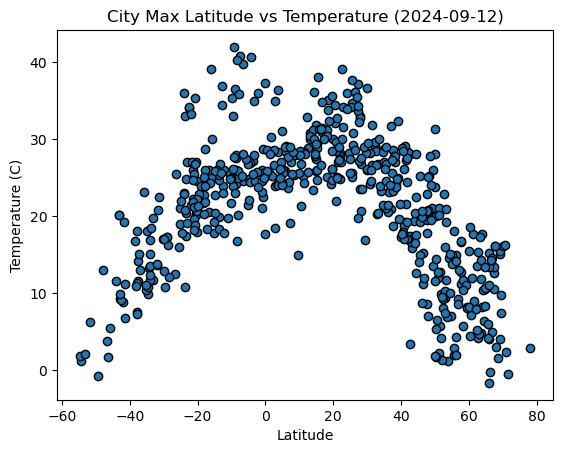

<Figure size 640x480 with 0 Axes>

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black', linewidths=1)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
date_format = time.strftime('%Y-%m-%d', time.localtime(1726168329))
plt.title(f"City Max Latitude vs Temperature ({date_format})")
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

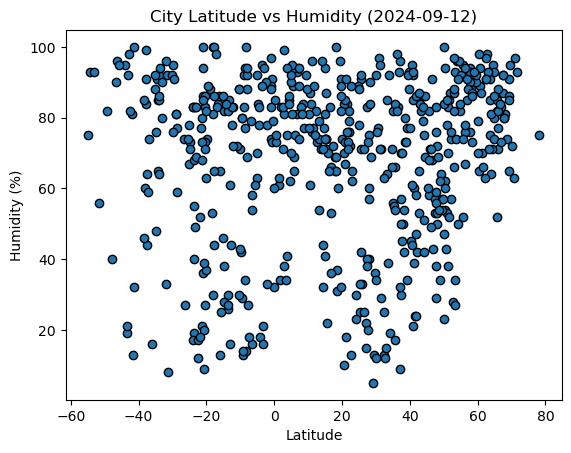

<Figure size 640x480 with 0 Axes>

In [47]:
# Build scatter plot for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='black', linewidths=1)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
date_format = time.strftime('%Y-%m-%d', time.localtime(1726168329))
plt.title(f"City Latitude vs Humidity ({date_format})")
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

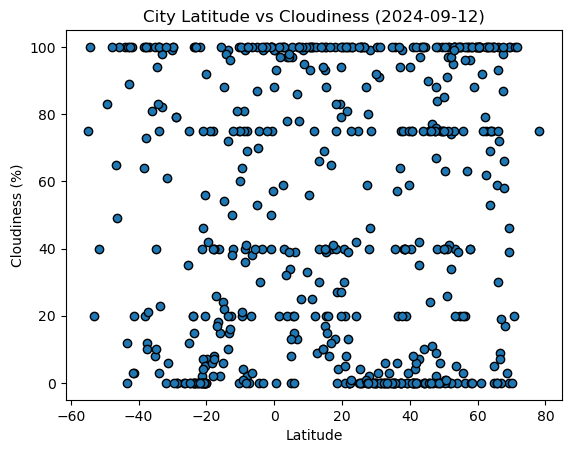

<Figure size 640x480 with 0 Axes>

In [48]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black', linewidths=1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
date_format = time.strftime('%Y-%m-%d', time.localtime(1726168329))
plt.title(f"City Latitude vs Cloudiness ({date_format})")
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

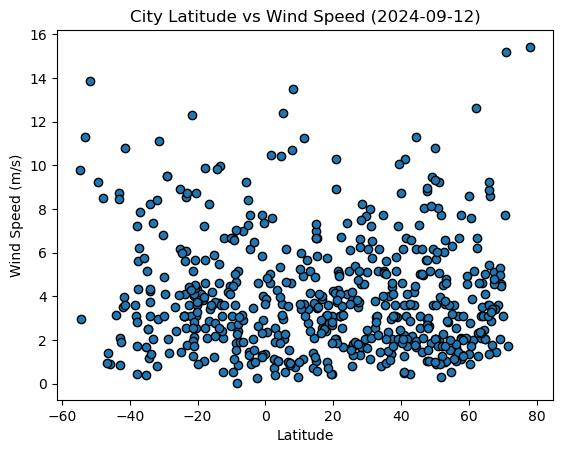

<Figure size 640x480 with 0 Axes>

In [49]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black', linewidths=1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
date_format = time.strftime('%Y-%m-%d', time.localtime(1726168329))
plt.title(f"City Latitude vs Wind Speed ({date_format})")
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guntakal junction,15.1667,77.3833,24.69,74,88,5.86,IN,1726168329
1,vernon,50.2581,-119.2691,19.96,54,63,0.89,CA,1726168330
4,talnakh,69.4865,88.3972,7.47,95,100,4.58,RU,1726168334
6,aasiaat,68.7098,-52.8699,1.57,74,3,3.60,GL,1726168337
7,suihua,46.6406,126.9969,11.22,68,77,4.97,CN,1726168338


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sao gabriel da cachoeira,-0.1303,-67.0892,37.30,32,88,1.34,BR,1726168332
3,waitangi,-43.9535,-176.5597,11.57,95,100,3.13,NZ,1726168333
5,queenstown,-31.8976,26.8753,13.70,33,0,0.80,ZA,1726168336
11,adamstown,-25.0660,-130.1015,18.92,67,12,8.92,PN,1726168343
17,edinburgh of the seven seas,-37.0676,-12.3116,12.97,74,100,7.86,SH,1726168350


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.5692935279112605


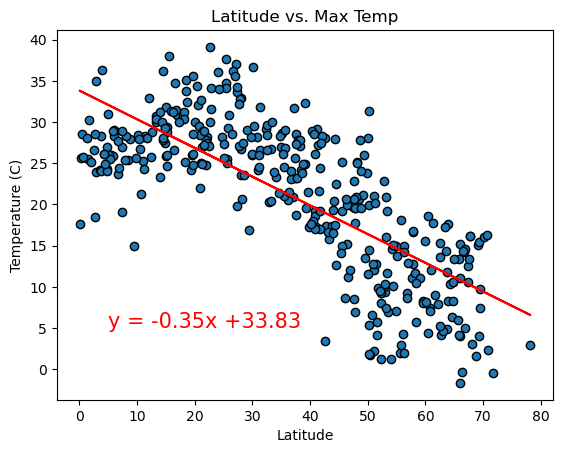

In [52]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black', linewidths=1)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
date_format = time.strftime('%Y-%m-%d', time.localtime(1726168329))
plt.title("Latitude vs. Max Temp")
plt.annotate(line_eq,(5, 5),fontsize=15,color="red")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.5684311775796131


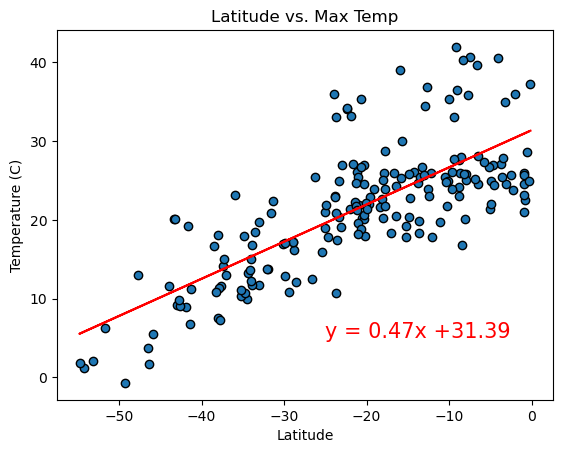

In [60]:
# Linear regression on Southern Hemisphere (COMMENT OUT plt.plot regression line before running,
# then run again with it no longer commented out)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black', linewidths=1)


plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
date_format = time.strftime('%Y-%m-%d', time.localtime(1726168329))
plt.title("Latitude vs. Max Temp")
plt.annotate(line_eq,((-25), 5),fontsize=15,color="red")

# to be able to run this, comment out for the first run  
plt.plot(x_values,regress_values,"r-")
##

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The linear regression is, as all linear regressions do, modelling the relationship between the two variables. Latitude and Max Temperature have a decently strong correlation, as there is a trend towards hotter max temperatures closer to the equator, as expected.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.013158101698070713


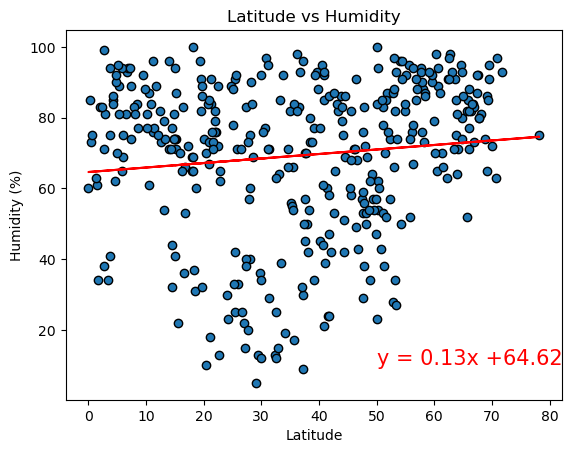

In [62]:
# Northern Hemisphere (COMMENT OUT plt.plot regression line before running,
# then run again with it no longer commented out)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='black', linewidths=1)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
date_format = time.strftime('%Y-%m-%d', time.localtime(1726168329))
plt.title("Latitude vs Humidity")
plt.annotate(line_eq,(50, 10),fontsize=15,color="red")

# to be able to run this, comment out for the first run  
plt.plot(x_values,regress_values,"r-")
##

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.01085970561310069


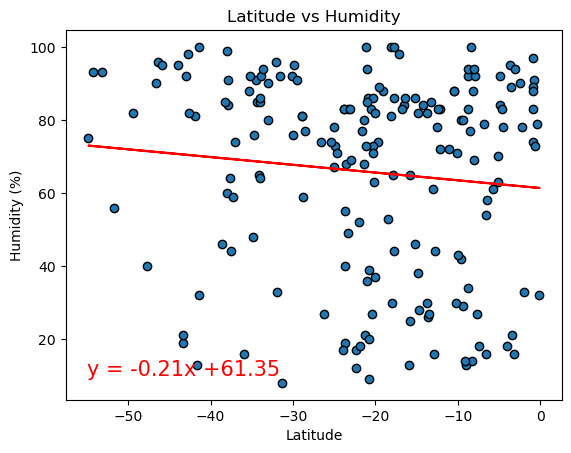

In [64]:
# Southern Hemisphere (COMMENT OUT plt.plot regression line before running,
# then run again with it no longer commented out)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='black', linewidths=1)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
date_format = time.strftime('%Y-%m-%d', time.localtime(1726168329))
plt.title("Latitude vs Humidity")
plt.annotate(line_eq,((-55), 10),fontsize=15,color="red")

# to be able to run this, comment out for the first run  
plt.plot(x_values,regress_values,"r-")
##

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is no real correlation between latitude and humidity, as shown by the dispersion of data points in all quadrants and the weak slope of the linear regression line.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0012252326729258246


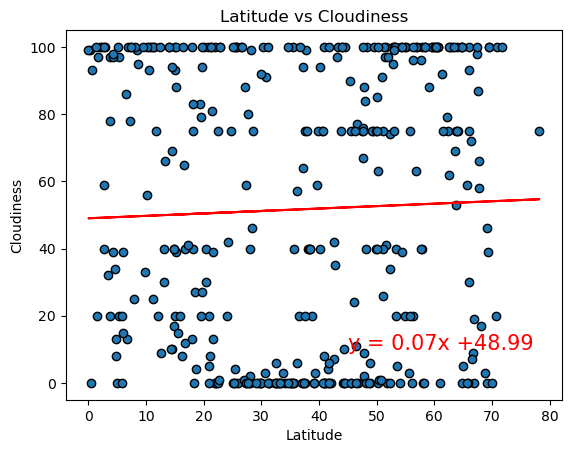

In [66]:
# Northern Hemisphere (COMMENT OUT plt.plot regression line before running,
# then run again with it no longer commented out)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black', linewidths=1)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
date_format = time.strftime('%Y-%m-%d', time.localtime(1726168329))
plt.title(f"Latitude vs Cloudiness")
plt.annotate(line_eq,(45, 10),fontsize=15,color="red")

# to be able to run this, comment out for the first run  
plt.plot(x_values,regress_values,"r-")
##

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 6.495693758174626e-05


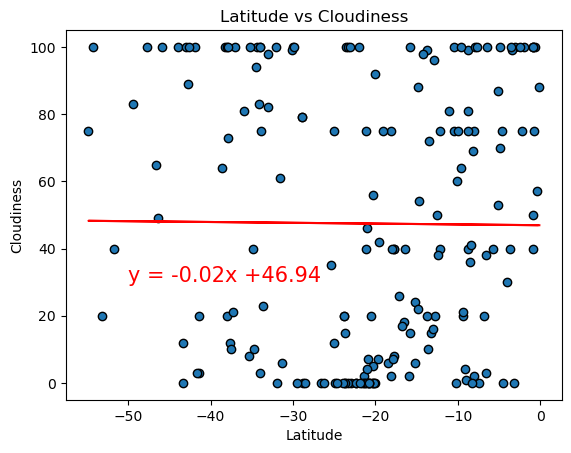

In [69]:
# Southern Hemisphere (COMMENT OUT plt.plot regression line before running,
# then run again with it no longer commented out)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black', linewidths=1)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
date_format = time.strftime('%Y-%m-%d', time.localtime(1726168329))
plt.title(f"Latitude vs Cloudiness")
plt.annotate(line_eq,((-50), 30),fontsize=15,color="red")

# to be able to run this, comment out for the first run  
plt.plot(x_values,regress_values,"r-")
##

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is no real correlation between latitude and cloudiness, as shown by the dispersion of data points in all quadrants and the weak slope of the linear regression line, along with the miniscule r^2 value.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.002695110522013885


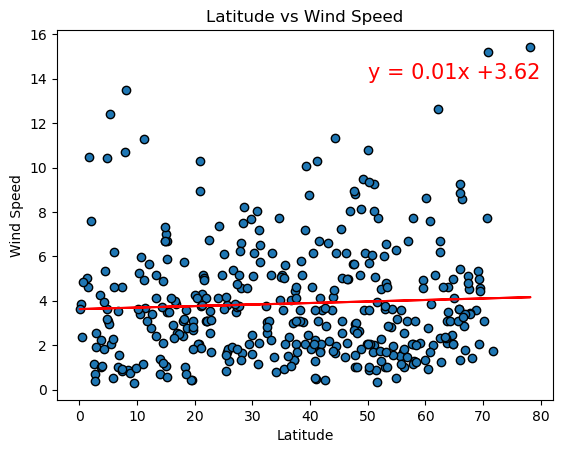

In [73]:
# Northern Hemisphere (COMMENT OUT plt.plot regression line before running,
# then run again with it no longer commented out)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black', linewidths=1)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
date_format = time.strftime('%Y-%m-%d', time.localtime(1726168329))
plt.title(f"Latitude vs Wind Speed")
plt.annotate(line_eq, (50,14),fontsize=15,color="red")

# to be able to run this, comment out for the first run  
plt.plot(x_values,regress_values,"r-")
##

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.033461343392318404


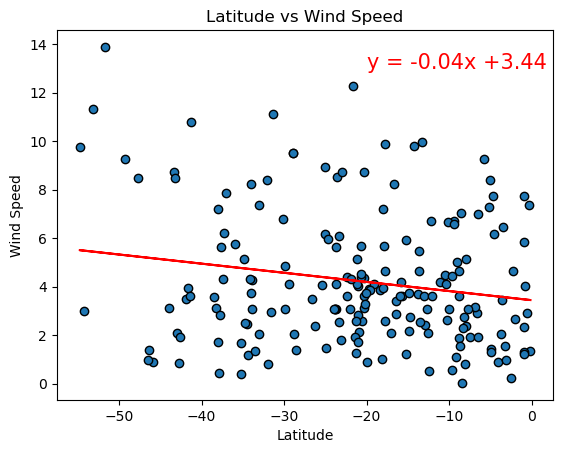

In [77]:
# Southern Hemisphere (COMMENT OUT plt.plot regression line before running,
# then run again with it no longer commented out)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black', linewidths=1)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
date_format = time.strftime('%Y-%m-%d', time.localtime(1726168329))
plt.title(f"Latitude vs Wind Speed")
plt.annotate(line_eq, ((-20),13),fontsize=15,color="red")

# to be able to run this, comment out for the first run  
plt.plot(x_values,regress_values,"r-")
##

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is no strong correlation between latitude and wind speed, as shown by the dispersion of data points in all quadrants and the weak slope of the linear regression line, along with the miniscule r^2 value.